In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sohai\Downloads\archive\merged_data.csv')

C:\Users\sohai\AppData\Local\Temp\ipykernel_16652\878367839.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\sohai\Downloads\archive\merged_data.csv')


In [2]:
df['id'].unique()

array([15, '15', '5C', '6B', '6D', '7A', '7E', '83', 83, '8B', '94', 94,
       'BG', 'CE', 'DF', 'E4', 'EG', 'F5'], dtype=object)

In [3]:
df.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['dt'] = df['datetime'].diff().dt.total_seconds()



0.03124992
Sampling rate: 32.000081920209716 Hz


In [25]:
# Check time unit by inspecting min, max, mean
print("Min dt:", df['dt'].min())
print("Max dt:", df['dt'].max())
print("Mean dt:", df['dt'].mean())
print("Median dt:", df['dt'].median())
print("Mode dt:", df['dt'].mode()[0])

# Ensure dt is in seconds
if df['dt'].median() > 1:  # unlikely for your dataset
    print("Warning: dt seems too large, check datetime format")
else:
    print("Time unit is in seconds ✅")

Min dt: -18700980.0
Max dt: 10788240.0
Mean dt: 0.11368097279966614
Median dt: 0.03124992
Mode dt: 0.03124992
Time unit is in seconds ✅


In [26]:
# Print the most common time difference
print(df['dt'].mode()[0])
dt = df['dt'].mode()[0]   # most common time gap
sampling_rate = 1 / dt
print("Sampling rate:", sampling_rate, "Hz")

0.03124992
Sampling rate: 32.000081920209716 Hz


In [6]:
max(df["datetime"].dt.hour)

23

In [7]:
dfworking_df = df[(df["datetime"].dt.hour >= 8) & (df["datetime"].dt.hour < 23)]

Mean dt: 0.7570415763204584
Median dt: 0.03124992
Mode dt: 0.03124992
Min dt: -15540208.281250048
Max dt: 17629979.78125005


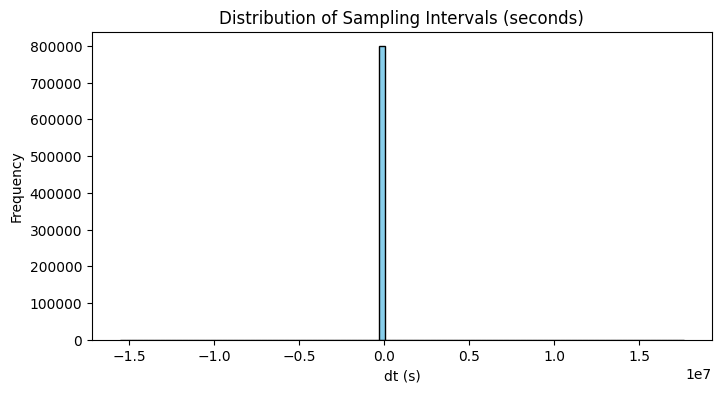

In [24]:
import matplotlib.pyplot as plt

# Compute time differences in seconds
dfworking_df['dt'] = dfworking_df['datetime'].diff().dt.total_seconds()

# Drop NaN (first row)
dt_values = dfworking_df['dt'].dropna()

# Basic statistics
print("Mean dt:", dt_values.mean())
print("Median dt:", dt_values.median())
print("Mode dt:", dt_values.mode()[0])
print("Min dt:", dt_values.min())
print("Max dt:", dt_values.max())

# Plot histogram of dt values
plt.figure(figsize=(8,4))
plt.hist(dt_values, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Sampling Intervals (seconds)")
plt.xlabel("dt (s)")
plt.ylabel("Frequency")
plt.show()


In [8]:
dfworking_df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label,dt
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0,NaN
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0,0.03125
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0,0.03125
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0,0.03125
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0,0.03125
...,...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.875000064,2.0,0.03125
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.906249984,2.0,0.03125
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.937499904,2.0,0.03125
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,F5,2020-07-23 17:28:59.968750080,2.0,0.03125


In [9]:
dfworking_df.drop('dt', axis=1, inplace=True)

C:\Users\sohai\AppData\Local\Temp\ipykernel_16652\4015059855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfworking_df.drop('dt', axis=1, inplace=True)


In [10]:
dfworking_df.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

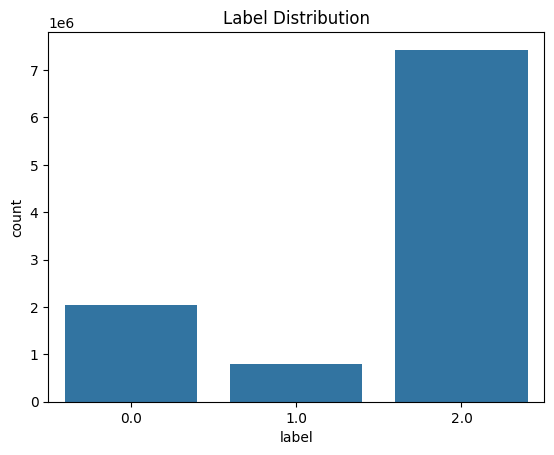

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfworking_df, x='label')

plt.title("Label Distribution")
plt.show()


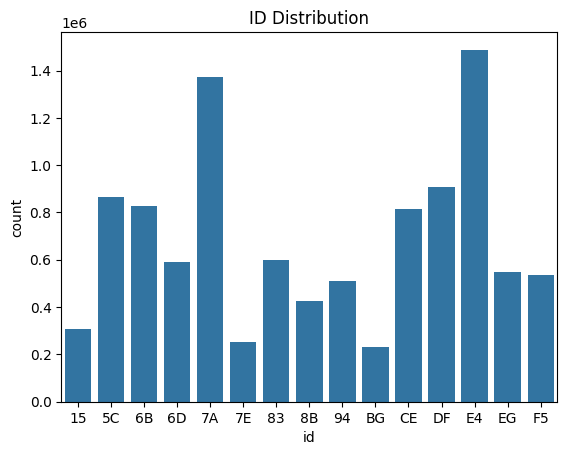

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfworking_df, x='id')

plt.title("ID Distribution")
plt.show()


In [13]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
ids=dfworking_df['id'].unique()
id_dict ={}
for i in range(len(ids)):
    id_dict[ids[i]] = i
id_dict

dfworking_df['id'] = dfworking_df['id'].map(id_dict)

C:\Users\sohai\AppData\Local\Temp\ipykernel_16652\3267515782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfworking_df['id'] = dfworking_df['id'].map(id_dict)


In [15]:
dfworking_df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,0,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,16,2020-07-23 17:28:59.968750080,2.0


In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Balance dataset per nurse BEFORE SMOTE
print("\nBalancing dataset per nurse...")

grouped = dfworking_df.groupby('id')
min_count = grouped.size().min()
print("Minimum samples among all nurses:", min_count)

balanced_df = grouped.apply(lambda x: x.iloc[:min_count]).reset_index(drop=True)
dfworking_df = balanced_df

print("Balanced dataset shape:", dfworking_df.shape)
print("Samples per nurse:\n", dfworking_df['id'].value_counts())

# ---------------------------------------------------------
# Prepare features and labels for SMOTE
# Exclude 'id' from features
X = dfworking_df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']]  # only numeric features
y = dfworking_df['label']
ids = dfworking_df['id']  # keep IDs separate

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_res, y_res = smote.fit_resample(X, y)

# Merge ID column back (repeat IDs according to SMOTE sampling)
# We need to repeat IDs according to the resampling ratio
import numpy as np

resample_ratio = len(y_res) / len(y)
# np.repeat will repeat each ID proportional to resampling
ids_res = np.repeat(ids.values, np.ceil(resample_ratio).astype(int))[:len(y_res)]

# Create resampled DataFrame
dfworking_df_resampled = pd.DataFrame(x_res, columns=X.columns)
dfworking_df_resampled['label'] = y_res
dfworking_df_resampled['id'] = ids_res

print(dfworking_df_resampled.head())
print(dfworking_df_resampled['id'].unique())  # IDs are now original strings



Balancing dataset per nurse...
Minimum samples among all nurses: 46987
Balanced dataset shape: (798779, 10)
Samples per nurse:
 id
0     46987
1     46987
2     46987
3     46987
4     46987
5     46987
6     46987
7     46987
8     46987
9     46987
10    46987
11    46987
12    46987
13    46987
14    46987
15    46987
16    46987
Name: count, dtype: int64


C:\Users\sohai\AppData\Local\Temp\ipykernel_16652\2046811673.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = grouped.apply(lambda x: x.iloc[:min_count]).reset_index(drop=True)


      X     Y     Z       EDA     HR   TEMP  label  id
0 -13.0 -61.0   5.0  6.769995  99.43  31.17    2.0   0
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17    2.0   0
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17    2.0   0
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17    2.0   0
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17    2.0   0
[ 0  1  2  3  4  5  6  7  8  9 10 11]


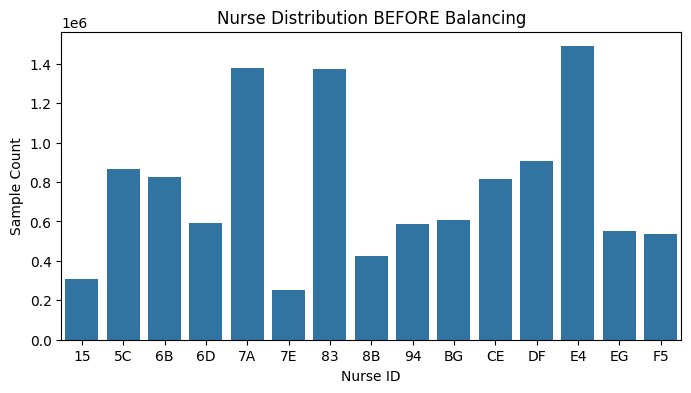

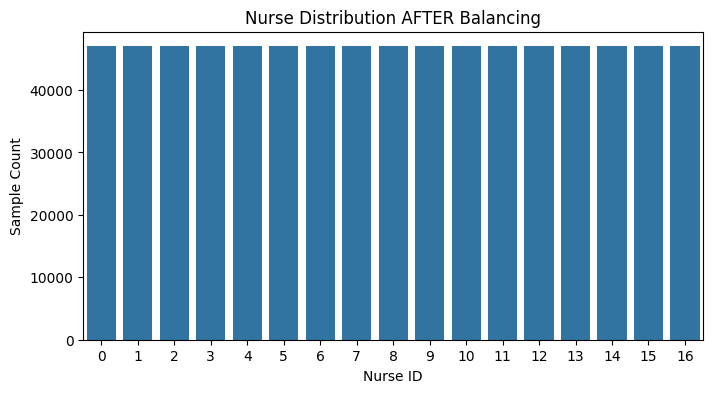

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# BEFORE balancing visualization
# ----------------------------------------
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='id')
plt.title("Nurse Distribution BEFORE Balancing")
plt.xlabel("Nurse ID")
plt.ylabel("Sample Count")
plt.show()

# ----------------------------------------
# AFTER balancing visualization
# ----------------------------------------
plt.figure(figsize=(8,4))
sns.countplot(data=dfworking_df, x='id')
plt.title("Nurse Distribution AFTER Balancing")
plt.xlabel("Nurse ID")
plt.ylabel("Sample Count")
plt.show()


In [18]:
dfworking_df_resampled = pd.DataFrame(x_res, columns=X.columns)  # features
dfworking_df_resampled['label'] = y_res  # attach labels

print(dfworking_df_resampled.head())

      X     Y     Z       EDA     HR   TEMP  id  label
0 -13.0 -61.0   5.0  6.769995  99.43  31.17   0    2.0
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17   0    2.0
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17   0    2.0
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17   0    2.0
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17   0    2.0


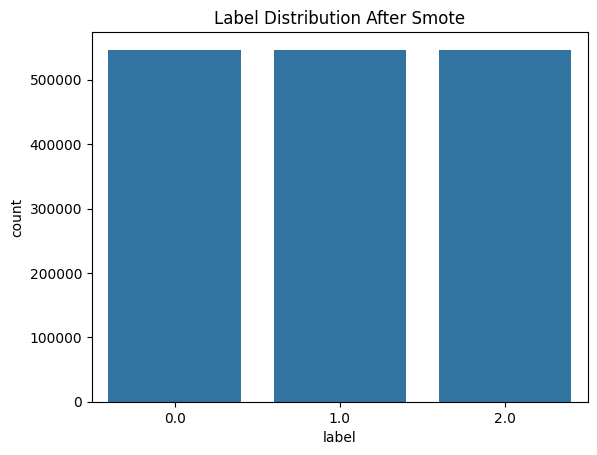

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfworking_df_resampled, x='label')

plt.title("Label Distribution After Smote")
plt.show()


In [20]:
dfworking_df.columns

Index(['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'id', 'datetime', 'label'], dtype='object')

## Normalization

In [21]:
from sklearn.preprocessing import StandardScaler

cols = ['X','Y','Z','EDA','HR','TEMP']
scaler = StandardScaler()
dfworking_df_resampled[cols] = scaler.fit_transform(dfworking_df_resampled[cols])

In [22]:
dfworking_df_resampled

,X,Y,Z,EDA,HR,TEMP,id,label
0,0.423126,-1.550728,-1.039216,0.023927,0.695239,-1.150370,0,2.0
1,0.206868,-1.789446,-1.192132,0.023927,0.695239,-1.150370,0,2.0
2,-0.132965,-2.058004,-1.421507,0.023927,0.695239,-1.150370,0,2.0
3,-0.627269,-1.670087,-1.861141,0.023927,0.695239,-1.150370,0,2.0
4,-1.245149,-1.431369,-2.147859,0.023927,0.695239,-1.150370,0,2.0
...,...,...,...,...,...,...,...,...
1639693,2.400341,-0.655534,1.292758,1.131413,1.017210,0.817540,2,1.0
1639694,0.145080,-1.013612,1.292758,1.704410,-0.643936,1.255847,2,1.0
1639695,1.041006,2.089727,1.292758,0.680746,2.646302,0.781759,2,1.0
1639696,-0.950121,0.544776,1.292758,0.386184,-0.769305,0.611804,2,1.0


## Feature Engineering

In [23]:
import numpy as np
from scipy.signal import find_peaks
import pywt
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pywt'

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def extract_time_features(signal):
    return {
        'mean': np.mean(signal),
        'std': np.std(signal),
        'var': np.var(signal),
        'min': np.min(signal),
        'max': np.max(signal),
        'range': np.max(signal) - np.min(signal),
        'median': np.median(signal),
        'skewness': skew(signal),
        'kurtosis': kurtosis(signal),
        'rms': np.sqrt(np.mean(signal**2)),
        'energy': np.sum(signal**2),
        'zero_crossings': ((signal[:-1] * signal[1:]) < 0).sum()
    }

def extract_freq_features(signal, dt=1.0):
    fft_vals = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=dt)
    fft_power = np.abs(fft_vals)**2
    return {
        'spectral_energy': np.sum(fft_power),
        'dominant_freq': fft_freq[np.argmax(fft_power)],
        'mean_freq': np.sum(fft_freq * fft_power) / np.sum(fft_power),
    }


def extract_features_per_window(df, cols, window_size, step_size):
    """Extract features per window for all signals."""
    features_list = []
    
    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        window = df.iloc[start:end]

        feature_dict = {}
        
        for col in cols:
            signal = window[col].values

            tfeat = extract_time_features(signal)
            ffeat = extract_freq_features(signal)

            # prefix with the column name
            tfeat = {f"{col}_{k}": v for k, v in tfeat.items()}
            ffeat = {f"{col}_{k}": v for k, v in ffeat.items()}

            feature_dict.update(tfeat)
            feature_dict.update(ffeat)
        
        # add label of the window → majority vote
        if "label" in df.columns:
            feature_dict["label"] = window["label"].mode()[0]
            feature_dict["id"] = window["id"].mode()[0]

        features_list.append(feature_dict)

    return pd.DataFrame(features_list)


In [ ]:
grouped = dfworking_df_resampled.groupby('id')
print(grouped.groups.keys())  # prints all unique nurse IDs


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])


In [ ]:
final_features = []
cols = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']

window_size = 960    # 30s window
step_size = 480      # 50% overlap

for pid, df_person in dfworking_df_resampled.groupby('id'):
    df_person = df_person.reset_index(drop=True)
    person_features_df = extract_features_per_window(df_person, cols, window_size, step_size)
    person_features_df['id'] = pid
    final_features.append(person_features_df)   

features_df = pd.concat(final_features, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': skew(signal),
C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': kurtosis(signal),
C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skewness': skew(signal),
C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1205751374.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identi

In [ ]:
features_df

,X_mean,X_std,X_var,X_min,X_max,X_range,X_median,X_skewness,X_kurtosis,X_rms,...,TEMP_skewness,TEMP_kurtosis,TEMP_rms,TEMP_energy,TEMP_zero_crossings,TEMP_spectral_energy,TEMP_dominant_freq,TEMP_mean_freq,label,id
0,0.053472,0.582145,0.338893,-2.406029,1.973742,4.379770,0.241444,-1.059293,1.043252,0.584596,...,0.122822,-0.566413,0.252355,61.135786,0,5.869035e+04,0.0,0.000000e+00,2,0
1,0.246347,0.211076,0.044553,-0.346883,0.862457,1.209340,0.176075,0.905268,0.313597,0.324407,...,-0.589208,-1.238926,0.198088,37.669134,0,3.616237e+04,0.0,0.000000e+00,2,0
2,0.393055,0.239533,0.057376,-0.150774,0.862457,1.013230,0.502923,-0.081125,-1.534777,0.460291,...,0.715465,-0.201071,0.162113,25.229431,0,2.422025e+04,0.0,2.291931e-21,2,0
3,0.677345,0.153002,0.023409,0.372184,1.320045,0.947861,0.666348,0.380863,-0.602682,0.694410,...,0.155200,-1.021396,0.135832,17.712290,0,1.700380e+04,0.0,1.305853e-20,2,0
4,0.046663,0.904408,0.817954,-2.765562,1.973742,4.739304,0.568293,-0.374780,-1.617142,0.905611,...,0.231743,-0.747840,0.111748,11.988070,0,1.150855e+04,0.0,9.646943e-21,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46413,1.385492,0.999561,0.999123,-1.237154,3.830055,5.067210,1.330285,0.024985,-0.838508,1.708423,...,-0.656033,-0.515774,1.308184,1642.892753,0,1.577177e+06,0.0,-2.029256e-06,0,16
46414,1.367892,1.002913,1.005835,-1.237154,3.818170,5.055324,1.318973,0.030236,-0.862292,1.696161,...,-0.628521,-0.555429,1.307453,1641.056133,0,1.575414e+06,0.0,-3.950249e-06,0,16
46415,1.331091,1.003682,1.007377,-1.233652,3.818170,5.051822,1.287360,0.068042,-0.911367,1.667087,...,-0.574172,-0.649125,1.309724,1646.761074,0,1.580891e+06,0.0,-1.524559e-05,0,16
46416,1.279967,0.974726,0.950091,-1.233652,3.807674,5.041325,1.281509,0.056534,-0.761701,1.608853,...,-0.616813,-0.544765,1.312977,1654.951849,0,1.588754e+06,0.0,-1.510753e-05,0,16


In [ ]:
features_df.to_csv(r'D:\University\Biomedical Signal Processing\Project\features_data.csv', index=False)

In [ ]:
features_df['label']=features_df['label'].astype(int)

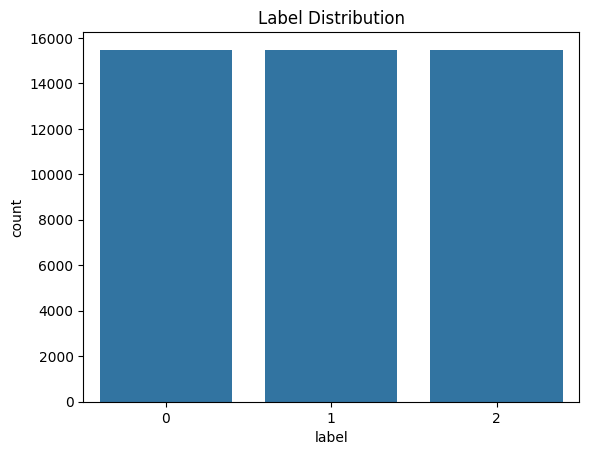

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=features_df, x='label')

plt.title("Label Distribution")
plt.show()


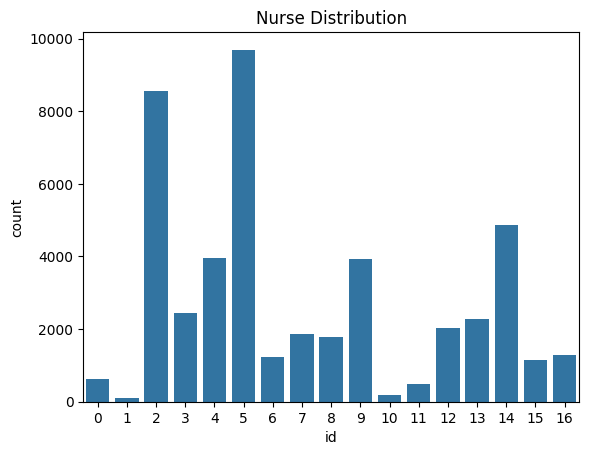

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=features_df, x='id')

plt.title("Nurse Distribution")
plt.show()
